<a href="https://colab.research.google.com/github/argareeva/Scientific_Research/blob/main/Scientific_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip --version

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.8 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Прекурсор       10 non-null     int64  
 1   Растворитель    10 non-null     int64  
 2   t, C            10 non-null     int64  
 3   t, ч            10 non-null     int64  
 4   pH              10 non-null     float64
 5   HNO3            10 non-null     int64  
 6   CH3COOH         10 non-null     int64  
 7   HCl             10 non-null     int64  
 8   H2SO4           10 non-null     int64  
 9   t1, C           10 non-null     float64
 10  H1, Дж/г        10 non-null     float64
 11  t2, C           10 non-null     float64
 12  H2, Дж/г        10 non-null     float64
 13  Фазовый состав  10 non-null     int64  
 14  a(842), A       8 non-null      float64
 15  D(842), нм      8 non-null      float64
 16  SBET, м2/г      10 non-null     float64
 17  Vпор, см3/г     10 non-null     float6

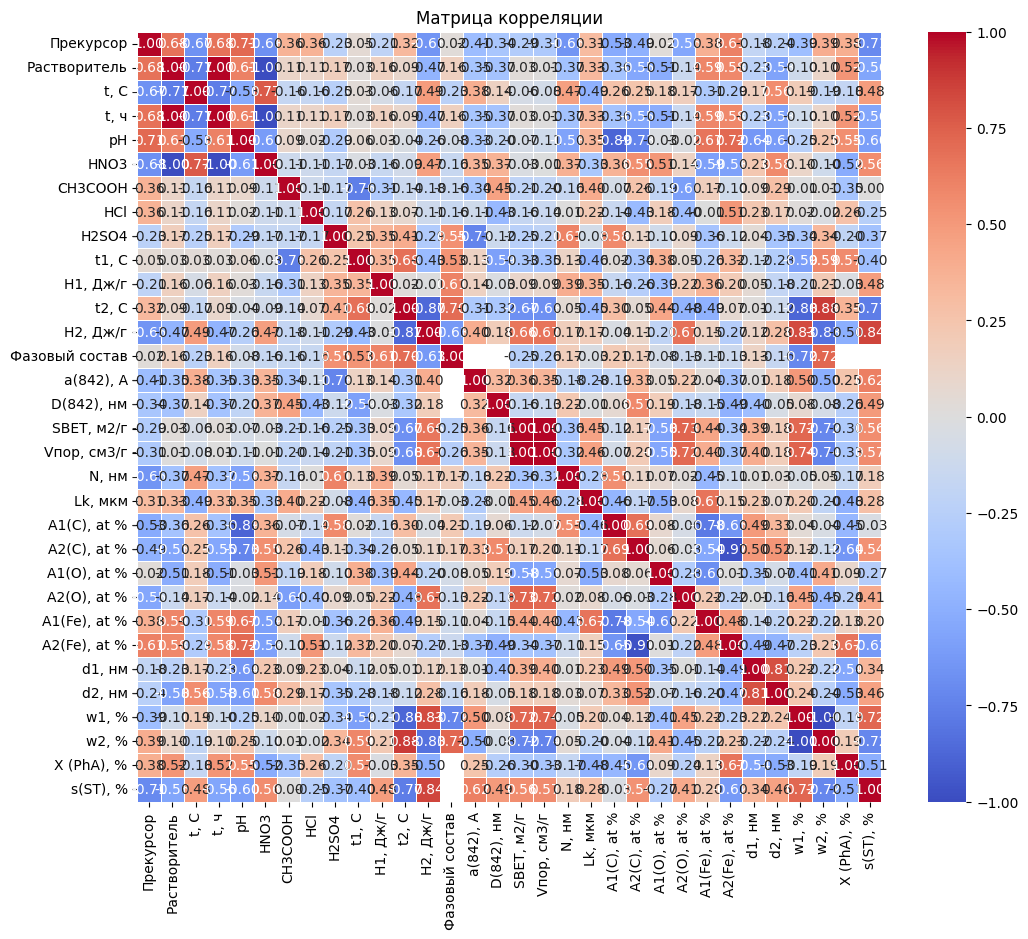

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv', delimiter=';')

print(data.info())
print(data.describe())

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

In [ ]:
high_corr_features = correlation_matrix[abs(correlation_matrix) > 0.5]
high_corr_features = high_corr_features.unstack().dropna().to_dict()

filtered_corr = {}
for (feature1, feature2), corr in high_corr_features.items():
    if feature1 != feature2 and (feature2, feature1) not in filtered_corr:
        filtered_corr[(feature1, feature2)] = corr

filtered_corr = {k: v for k, v in filtered_corr.items() if abs(v) > 0.5}

print("Признаки с корреляцией больше чем на 0,5:")
for (feature1, feature2), corr in filtered_corr.items():
    print(f"{feature1} и {feature2}: {corr}")

Признаки с корреляцией больше чем на 0,5:
Прекурсор и Растворитель: 0.6767529681839587
Прекурсор и t, C: -0.669854250836097
Прекурсор и t, ч: 0.6767529681839597
Прекурсор и pH: 0.7128298645537899
Прекурсор и HNO3: -0.67675296818396
Прекурсор и H2, Дж/г: -0.6532778507122121
Прекурсор и N, нм: -0.6528246469644239
Прекурсор и A1(C), at %: -0.5312267965949543
Прекурсор и A2(O), at %: -0.553001665508913
Прекурсор и A2(Fe), at %: 0.6136273136801296
Прекурсор и s(ST), %: -0.7074915598647552
Растворитель и t, C: -0.7705344528662038
Растворитель и t, ч: 1.0000000000000002
Растворитель и pH: 0.6105803270971749
Растворитель и HNO3: -1.0000000000000002
Растворитель и A2(C), at %: -0.5524087598723517
Растворитель и A1(O), at %: -0.5103008114216737
Растворитель и A1(Fe), at %: 0.5881476338114068
Растворитель и A2(Fe), at %: 0.5783579441532848
Растворитель и d2, нм: -0.5750546327852957
Растворитель и X (PhA), %: 0.5193120217665033
Растворитель и s(ST), %: -0.5561363041951717
t, C и t, ч: -0.770534452

Из предоставленной матрицы корреляции можно сделать следующие выводы:

1. Сильная корреляция (более 0.7 или менее -0.7) между признаками:
   - Растворитель и t, ч: 1.0 (положительная корреляция)
   - t, C и t, ч: -0.7705 (отрицательная корреляция)
   - t2, C и w1, %: -0.8819 (отрицательная корреляция)
   - t2, C и w2, %: 0.8819 (положительная корреляция)
   - t2, C и s(ST), %: -0.7724 (отрицательная корреляция)
   - SBET, м2/г и Vпор, см3/г: 0.9956 (положительная корреляция)

2. Умеренная корреляция (от 0.5 до 0.7 или от -0.5 до -0.7) между признаками:
   - Прекурсор и pH: 0.7128 (положительная корреляция)
   - t, C и pH: -0.5311 (отрицательная корреляция)
   - t, C и HNO3: 0.7705 (положительная корреляция)
   - pH и A1(C), at %: -0.8898 (отрицательная корреляция)
   - H2, Дж/г и s(ST), %: 0.8438 (положительная корреляция)

3. Слабая корреляция (менее 0.5 или более -0.5) между признаками:
   - pH и HNO3: -0.6106 (отрицательная корреляция)
   - HNO3 и A2(C), at %: 0.5524 (положительная корреляция)
   - Lk, мкм и A1(O), at %: -0.5254 (отрицательная корреляция)
   - A1(C), at % и A2(Fe), at %: -0.9703 (отрицательная корреляция)
   - d1, нм и d2, нм: 0.81 (положительная корреляция)
   - w1, % и w2, %: -1.0 (положительная корреляция)

4. Есть также несколько признаков, которые коррелируют между собой, что может привести к мультиколлинеарности:
   - SBET, м2/г и Vпор, см3/г: 0.9956 (положительная корреляция)
   - t2, C и w1, %: -0.8819 (отрицательная корреляция)
   - t2, C и w2, %: 0.8819 (положительная корреляция)
   - w1, % и w2, %: -1.0 (положительная корреляция)

**Фазовый состав**

---

1.   Линейная регрессия не сработала
2.   Decision Tree - идеальные метрики (обучающая способность модели 100%)

Важны H1 и t2

In [ ]:
data_fs = data.drop(columns=['a(842), A', 'D(842), нм', 'SBET, м2/г', 'Vпор, см3/г', 'N, нм', 'Lk, мкм', 'd1, нм', 'd2, нм', 'w1, %', 'w2, %', 'X (PhA), %', 's(ST), %'])
data_fs.head(10)

,Прекурсор,Растворитель,"t, C","t, ч",pH,HNO3,CH3COOH,HCl,H2SO4,"t1, C","H1, Дж/г","t2, C","H2, Дж/г",Фазовый состав,"A1(C), at %","A2(C), at %","A1(O), at %","A2(O), at %","A1(Fe), at %","A2(Fe), at %"
0,11,21,150,8,1.5,31,0,0,0,115.4,540.8,420.2,-20.32,41,70.21,69.70,25.92,26.97,3.85,3.25
1,12,22,24,24,6.0,0,0,0,0,114.7,547.4,417.8,-24.07,41,67.76,65.31,24.26,26.81,7.98,7.88
2,12,22,24,24,5.0,0,0,0,0,113.5,550.3,415.3,-19.48,41,68.00,66.57,21.47,27.95,10.51,5.46
3,13,22,24,24,5.7,0,31,0,0,110.8,535.8,419.7,-28.20,41,68.24,67.41,23.21,25.57,8.55,7.02
4,13,22,24,24,9.4,0,0,0,0,118.0,557.3,423.6,-29.40,42,65.30,62.10,24.71,26.85,9.98,11.05
5,13,22,24,24,5.7,0,0,0,0,116.8,520.4,425.1,-30.30,41,69.25,66.32,25.41,26.48,5.34,7.20
6,13,22,24,24,5.3,0,0,31,0,117.2,550.3,421.8,-27.40,41,67.91,62.14,24.63,25.95,7.46,11.91
7,12,22,24,24,2.5,0,0,0,31,117.9,561.5,427.2,-32.50,43,71.20,68.51,23.25,26.37,5.55,5.12
8,12,22,24,24,5.5,0,0,0,31,115.3,545.6,420.3,-24.27,41,69.41,63.49,24.15,27.26,6.44,9.25
9,12,22,120,24,5.0,0,0,0,0,116.1,549.7,419.6,-24.26,41,68.25,62.85,22.45,26.86,9.30,10.29


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

X = data_fs.drop(columns=['Фазовый состав'])
y = data_fs['Фазовый состав']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = logreg_model.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.4}')
print(f'Precision: {precision:.4}')
print(f'Recall: {recall:.4}')
print(f'F1 Score: {f1:.4}')

Accuracy: 0.5
Precision: 1.0
Recall: 0.5
F1 Score: 0.6667


In [ ]:
feature_weights = logreg_model.coef_
print(f'Feature Weights: {feature_weights}')

Feature Weights: [[-7.23393931e-03  1.35155299e-02  4.34188760e-02  1.47826868e-02
  -9.41507960e-02 -7.99943303e-05  5.39486455e-02  1.13909369e-01
  -1.14578606e-01 -3.36816129e-02 -7.53228947e-02  8.61393987e-02
   1.84023032e-01  1.06249239e-01  1.30872167e-01 -3.94235457e-02
   3.11444742e-02 -5.51935220e-03 -1.00966297e-01]
 [ 1.32019963e-02 -1.02417180e-02 -3.38904607e-02 -1.11664551e-02
   1.21561283e-01 -1.31579702e-05 -4.13161405e-02 -9.91660281e-02
  -7.88700773e-02  3.75053973e-02  6.56897190e-02 -6.45547578e-02
  -1.46963372e-01 -1.20802734e-01 -1.45413904e-01  4.51908252e-02
  -2.31354249e-02  2.91075483e-02  1.22323630e-01]
 [-5.96805699e-03 -3.27381191e-03 -9.52841529e-03 -3.61623169e-03
  -2.74104872e-02  9.31523004e-05 -1.26325050e-02 -1.47433409e-02
   1.93448684e-01 -3.82378446e-03  9.63317568e-03 -2.15846409e-02
  -3.70596596e-02  1.45534950e-02  1.45417370e-02 -5.76727945e-03
  -8.00904936e-03 -2.35881961e-02 -2.13573335e-02]]


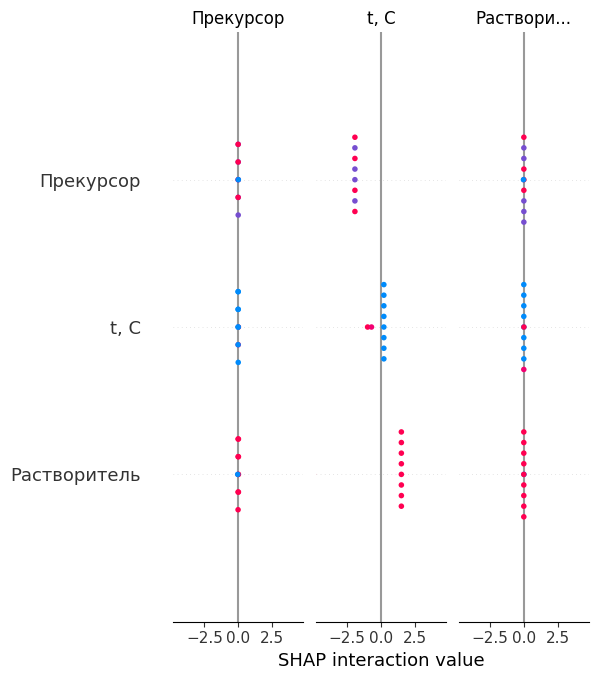

In [ ]:
import shap
import numpy as np

explainer = shap.Explainer(logreg_model, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, feature_names=X.columns)

**ОКР**

---


1.   Линейная регрессия, random forest tree, xgboost - не сработали (r2 < 0)
2.   Decision tree - неплохие метрики (удалила столбцы с сильной корреляцией, обучающая способность модели 53%)

Важен t1

In [ ]:
data_okr = data.drop(columns=['a(842), A', 'Фазовый состав', 'SBET, м2/г', 'Vпор, см3/г', 'N, нм', 'Lk, мкм', 'd1, нм', 'd2, нм', 'w1, %', 'w2, %', 'X (PhA), %', 's(ST), %'])
data_okr = data_okr.dropna(subset='D(842), нм')
data_okr.head(10)

,Прекурсор,Растворитель,"t, C","t, ч",pH,HNO3,CH3COOH,HCl,H2SO4,"t1, C","H1, Дж/г","t2, C","H2, Дж/г","D(842), нм","A1(C), at %","A2(C), at %","A1(O), at %","A2(O), at %","A1(Fe), at %","A2(Fe), at %"
0,11,21,150,8,1.5,31,0,0,0,115.4,540.8,420.2,-20.32,33.4,70.21,69.70,25.92,26.97,3.85,3.25
1,12,22,24,24,6.0,0,0,0,0,114.7,547.4,417.8,-24.07,37.8,67.76,65.31,24.26,26.81,7.98,7.88
2,12,22,24,24,5.0,0,0,0,0,113.5,550.3,415.3,-19.48,21.3,68.00,66.57,21.47,27.95,10.51,5.46
3,13,22,24,24,5.7,0,31,0,0,110.8,535.8,419.7,-28.20,35.1,68.24,67.41,23.21,25.57,8.55,7.02
5,13,22,24,24,5.7,0,0,0,0,116.8,520.4,425.1,-30.30,19.7,69.25,66.32,25.41,26.48,5.34,7.20
6,13,22,24,24,5.3,0,0,31,0,117.2,550.3,421.8,-27.40,17.9,67.91,62.14,24.63,25.95,7.46,11.91
8,12,22,24,24,5.5,0,0,0,31,115.3,545.6,420.3,-24.27,24.0,69.41,63.49,24.15,27.26,6.44,9.25
9,12,22,120,24,5.0,0,0,0,0,116.1,549.7,419.6,-24.26,21.2,68.25,62.85,22.45,26.86,9.30,10.29


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data_okr.drop(columns=['D(842), нм', 'A1(C), at %', 'A2(C), at %', 'A2(Fe), at %'])
y = data_okr['D(842), нм']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor()

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

print("Оптимальные параметры:", grid_search_dt.best_params_)

cv_scores = cross_val_score(grid_search_dt.best_estimator_, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
print(f'Среднее значение MSE на кросс-валидации: {-cv_scores.mean():.4}')

y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'MAE (Decision Tree): {mae_dt:.4}')
print(f'MSE (Decision Tree): {mse_dt:.4}')
print(f'R^2 (Decision Tree): {r2_dt:.4}')

Оптимальные параметры: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
Среднее значение MSE на кросс-валидации: 54.91
MAE (Decision Tree): 5.95
MSE (Decision Tree): 46.96
R^2 (Decision Tree): 0.5256


In [ ]:
dt_model_tuned = DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, min_samples_split=5, random_state=42)
dt_model_tuned.fit(X_train, y_train)

y_pred_dt_tuned = dt_model_tuned.predict(X_test)

mae_dt_tuned = mean_absolute_error(y_test, y_pred_dt_tuned)
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)
r2_score_tuned = r2_score(y_test, y_pred_dt_tuned)

print(f'MAE (Decision Tree): {mae_dt_tuned:.4}')
print(f'MSE (Decision Tree): {mse_dt_tuned:.4}')
print(f'R2-score (Decision Tree): {r2_score_tuned:.4}')

MAE (Decision Tree): 5.95
MSE (Decision Tree): 46.96
R2-score (Decision Tree): 0.5256


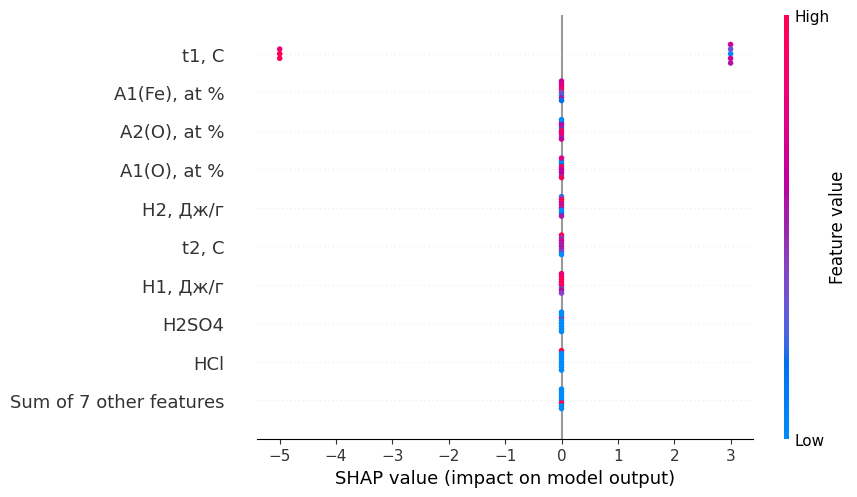

In [ ]:
import shap

explainer = shap.Explainer(dt_model_tuned, X)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

**МУРР**

---


1.   Линейная регрессия (все перепробовала, это самые адекватные метрики, но r2 < 0 плохо)
2.   Decision tree - взять их

Важен t2

In [ ]:
data_murr = data.drop(columns=['X (PhA), %', 's(ST), %'])
data_murr.head(10)

,Прекурсор,Растворитель,"t, C","t, ч",pH,HNO3,CH3COOH,HCl,H2SO4,"t1, C",...,"A1(C), at %","A2(C), at %","A1(O), at %","A2(O), at %","A1(Fe), at %","A2(Fe), at %","d1, нм","d2, нм","w1, %","w2, %"
0,11,21,150,8,1.5,31,0,0,0,115.4,...,70.21,69.70,25.92,26.97,3.85,3.25,9.7,25.9,86.06,13.94
1,12,22,24,24,6.0,0,0,0,0,114.7,...,67.76,65.31,24.26,26.81,7.98,7.88,9.1,24.0,90.28,9.72
2,12,22,24,24,5.0,0,0,0,0,113.5,...,68.00,66.57,21.47,27.95,10.51,5.46,9.9,25.3,96.49,3.51
3,13,22,24,24,5.7,0,31,0,0,110.8,...,68.24,67.41,23.21,25.57,8.55,7.02,9.6,25.4,83.61,16.39
4,13,22,24,24,9.4,0,0,0,0,118.0,...,65.30,62.10,24.71,26.85,9.98,11.05,9.2,24.3,71.25,28.75
5,13,22,24,24,5.7,0,0,0,0,116.8,...,69.25,66.32,25.41,26.48,5.34,7.20,9.5,24.8,81.25,18.75
6,13,22,24,24,5.3,0,0,31,0,117.2,...,67.91,62.14,24.63,25.95,7.46,11.91,9.7,25.2,84.25,15.75
7,12,22,24,24,2.5,0,0,0,31,117.9,...,71.20,68.51,23.25,26.37,5.55,5.12,9.8,24.9,74.23,25.77
8,12,22,24,24,5.5,0,0,0,31,115.3,...,69.41,63.49,24.15,27.26,6.44,9.25,9.3,24.1,84.29,15.71
9,12,22,120,24,5.0,0,0,0,0,116.1,...,68.25,62.85,22.45,26.86,9.30,10.29,9.5,25.1,87.24,12.76


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor

X = data_murr.drop(columns=['d1, нм', 'd2, нм', 'w1, %', 'w2, %', 'Фазовый состав', 'HCl', 't1, C', 'H2, Дж/г', 'H2, Дж/г', 'A1(O), at %', 'A2(C), at %', 'Vпор, см3/г', 'Растворитель', 'Прекурсор', 'a(842), A', 'D(842), нм', 'HNO3'])
y = data_murr[['d1, нм', 'd2, нм', 'w1, %', 'w2, %']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor()

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

print("Оптимальные параметры:", grid_search_dt.best_params_)

cv_scores = cross_val_score(grid_search_dt.best_estimator_, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
print(f'Среднее значение MSE на кросс-валидации: {-cv_scores.mean():.4}')

y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f'MAE (Decision Tree): {mae_dt:.4}')
print(f'MSE (Decision Tree): {mse_dt:.4}')

Оптимальные параметры: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
Среднее значение MSE на кросс-валидации: 68.71
MAE (Decision Tree): 0.9394
MSE (Decision Tree): 1.116


In [ ]:
dt_model_tuned = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5, random_state=42)
dt_model_tuned.fit(X_train, y_train)

y_pred_dt_tuned = dt_model_tuned.predict(X_test)

mae_dt_tuned = mean_absolute_error(y_test, y_pred_dt_tuned)
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)

print(f'MAE (Decision Tree): {mae_dt_tuned:.4}')
print(f'MSE (Decision Tree): {mse_dt_tuned:.4}')

MAE (Decision Tree): 0.9394
MSE (Decision Tree): 1.116


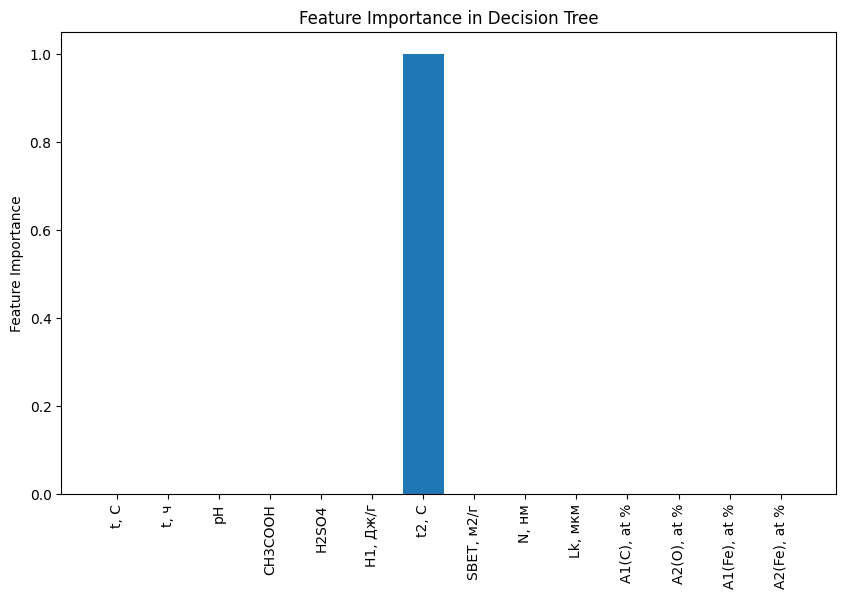

In [ ]:
import matplotlib.pyplot as plt

feature_importance = dt_model_tuned.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')

plt.show()

**Площадь поверхности**

---

1.   Если делать только на 7 объектах (убрать все nan значения и делать на линейной регрессии/деревьях/xgboost - метрики получаются плохие r2 < -40)
2.   XGBoost на 10 объектах (mae, mse большие, обучающая способность модели 50%)

Важны Lk, мкм и a(842), A


In [ ]:
data_s = data.drop(columns=['X (PhA), %', 's(ST), %', 'Vпор, см3/г'])
data_s.head(10)

,Прекурсор,Растворитель,"t, C","t, ч",pH,HNO3,CH3COOH,HCl,H2SO4,"t1, C",...,"A1(C), at %","A2(C), at %","A1(O), at %","A2(O), at %","A1(Fe), at %","A2(Fe), at %","d1, нм","d2, нм","w1, %","w2, %"
0,11,21,150,8,1.5,31,0,0,0,115.4,...,70.21,69.70,25.92,26.97,3.85,3.25,9.7,25.9,86.06,13.94
1,12,22,24,24,6.0,0,0,0,0,114.7,...,67.76,65.31,24.26,26.81,7.98,7.88,9.1,24.0,90.28,9.72
2,12,22,24,24,5.0,0,0,0,0,113.5,...,68.00,66.57,21.47,27.95,10.51,5.46,9.9,25.3,96.49,3.51
3,13,22,24,24,5.7,0,31,0,0,110.8,...,68.24,67.41,23.21,25.57,8.55,7.02,9.6,25.4,83.61,16.39
4,13,22,24,24,9.4,0,0,0,0,118.0,...,65.30,62.10,24.71,26.85,9.98,11.05,9.2,24.3,71.25,28.75
5,13,22,24,24,5.7,0,0,0,0,116.8,...,69.25,66.32,25.41,26.48,5.34,7.20,9.5,24.8,81.25,18.75
6,13,22,24,24,5.3,0,0,31,0,117.2,...,67.91,62.14,24.63,25.95,7.46,11.91,9.7,25.2,84.25,15.75
7,12,22,24,24,2.5,0,0,0,31,117.9,...,71.20,68.51,23.25,26.37,5.55,5.12,9.8,24.9,74.23,25.77
8,12,22,24,24,5.5,0,0,0,31,115.3,...,69.41,63.49,24.15,27.26,6.44,9.25,9.3,24.1,84.29,15.71
9,12,22,120,24,5.0,0,0,0,0,116.1,...,68.25,62.85,22.45,26.86,9.30,10.29,9.5,25.1,87.24,12.76


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

X = data_s.drop(columns=['SBET, м2/г', 'A1(O), at %', 'A2(O), at %', 'A1(C), at %', 'A2(C), at %', 'A1(Fe), at %', 'A2(Fe), at %', 't, C', 't1, C', 't2, C', 'H2, Дж/г', 'w1, %', 'w2, %', 'Фазовый состав', 'Прекурсор', 'Растворитель', 'pH', 'HNO3', 'CH3COOH', 'HCl', 'H2SO4'])
y = data_s['SBET, м2/г']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, reg_alpha=0.1, reg_lambda=0.1)
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Оптимальные параметры:", grid_search_xgb.best_params_)

y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'MAE (XGBoost): {mae_xgb}')
print(f'MSE (XGBoost): {mse_xgb}')
print(f'R^2 (XGBoost): {r2_xgb}')

Оптимальные параметры: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
MAE (XGBoost): 455.15185546875006
MSE (XGBoost): 208534.83965222602
R^2 (XGBoost): 0.4044721321430449


In [ ]:
xgboost_model = XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=2, n_estimators=100, random_state=42)
xgboost_model.fit(X_train, y_train)

xgboost_y_pred = xgboost_model.predict(X_test)
xgboost_mae = mean_absolute_error(y_test, xgboost_y_pred)
xgboost_mse = mean_squared_error(y_test, xgboost_y_pred)
xgboost_r2 = r2_score(y_test, xgboost_y_pred)

print(f'MAE (Tuned XGBoost): {xgboost_mae:.4}')
print(f'MSE (Tuned XGBoost): {xgboost_mse:.4}')
print(f'R^2 (Tuned XGBoost): {xgboost_r2:.4}')

MAE (Tuned XGBoost): 394.2
MSE (Tuned XGBoost): 1.725e+05
R^2 (Tuned XGBoost): 0.5073


In [ ]:
feature_weights = pd.DataFrame({'Feature': X.columns, 'Weight': xgboost_model.feature_importances_})
print(feature_weights)

      Feature    Weight
0        t, ч  0.000000
1    H1, Дж/г  0.000000
2   a(842), A  0.016819
3  D(842), нм  0.000000
4       N, нм  0.000000
5     Lk, мкм  0.983181
6      d1, нм  0.000000
7      d2, нм  0.000000


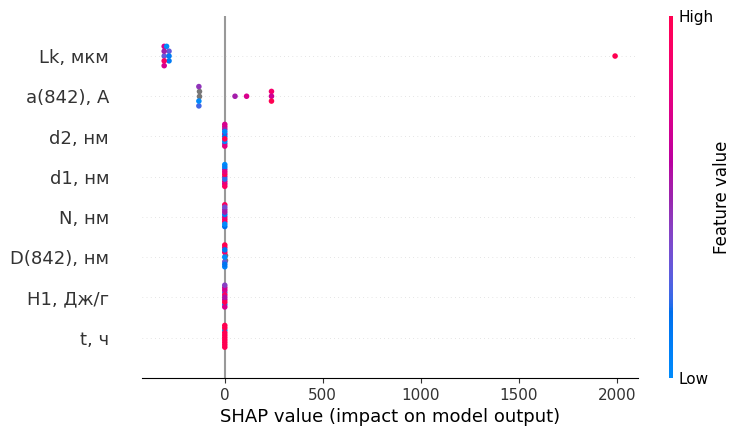

In [ ]:
import shap

explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

**Объем пор**

---



1. XGBoost (обучающая способность 70%, ломается, если удалить t2 - корреляция с этим признаком -0.68)
2. Линейная регрессия (обучающая способность 90%, очень сильно ломается, если удалить SBET - корреляция с этим признаком 0.996)
3. Деревья работают плохо

Больше склоняюсь к 1 варианту - важен t2 и чуть-чуть прекурсор + поговорить с ГМ по поводу результатов

In [ ]:
data_v = data.drop(columns=['X (PhA), %', 's(ST), %'])
data_v.head(10)

,Прекурсор,Растворитель,"t, C","t, ч",pH,HNO3,CH3COOH,HCl,H2SO4,"t1, C",...,"A1(C), at %","A2(C), at %","A1(O), at %","A2(O), at %","A1(Fe), at %","A2(Fe), at %","d1, нм","d2, нм","w1, %","w2, %"
0,11,21,150,8,1.5,31,0,0,0,115.4,...,70.21,69.70,25.92,26.97,3.85,3.25,9.7,25.9,86.06,13.94
1,12,22,24,24,6.0,0,0,0,0,114.7,...,67.76,65.31,24.26,26.81,7.98,7.88,9.1,24.0,90.28,9.72
2,12,22,24,24,5.0,0,0,0,0,113.5,...,68.00,66.57,21.47,27.95,10.51,5.46,9.9,25.3,96.49,3.51
3,13,22,24,24,5.7,0,31,0,0,110.8,...,68.24,67.41,23.21,25.57,8.55,7.02,9.6,25.4,83.61,16.39
4,13,22,24,24,9.4,0,0,0,0,118.0,...,65.30,62.10,24.71,26.85,9.98,11.05,9.2,24.3,71.25,28.75
5,13,22,24,24,5.7,0,0,0,0,116.8,...,69.25,66.32,25.41,26.48,5.34,7.20,9.5,24.8,81.25,18.75
6,13,22,24,24,5.3,0,0,31,0,117.2,...,67.91,62.14,24.63,25.95,7.46,11.91,9.7,25.2,84.25,15.75
7,12,22,24,24,2.5,0,0,0,31,117.9,...,71.20,68.51,23.25,26.37,5.55,5.12,9.8,24.9,74.23,25.77
8,12,22,24,24,5.5,0,0,0,31,115.3,...,69.41,63.49,24.15,27.26,6.44,9.25,9.3,24.1,84.29,15.71
9,12,22,120,24,5.0,0,0,0,0,116.1,...,68.25,62.85,22.45,26.86,9.30,10.29,9.5,25.1,87.24,12.76


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

X = data_v.drop(columns=['Vпор, см3/г'])
y = data_v['Vпор, см3/г']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, reg_alpha=0.1, reg_lambda=0.1)
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Оптимальные параметры:", grid_search_xgb.best_params_)

y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'MAE (XGBoost): {mae_xgb:.4}')
print(f'MSE (XGBoost): {mse_xgb:.4}')
print(f'R^2 (XGBoost): {r2_xgb:.4}')

Оптимальные параметры: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
MAE (XGBoost): 0.3821
MSE (XGBoost): 0.2117
R^2 (XGBoost): -1.73


In [ ]:
xgboost_model = XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=3, n_estimators=30, random_state=42)
xgboost_model.fit(X_train, y_train)

xgboost_y_pred = xgboost_model.predict(X_test)
xgboost_mae = mean_absolute_error(y_test, xgboost_y_pred)
xgboost_mse = mean_squared_error(y_test, xgboost_y_pred)
xgboost_r2 = r2_score(y_test, xgboost_y_pred)

print(f'MAE (Tuned XGBoost): {xgboost_mae:.4}')
print(f'MSE (Tuned XGBoost): {xgboost_mse:.4}')
print(f'R^2 (Tuned XGBoost): {xgboost_r2:.4}')

MAE (Tuned XGBoost): 0.1391
MSE (Tuned XGBoost): 0.02184
R^2 (Tuned XGBoost): 0.7184


In [ ]:
feature_weights = pd.DataFrame({'Feature': X.columns, 'Weight': xgboost_model.feature_importances_})
print(feature_weights)

           Feature    Weight
0        Прекурсор  0.022239
1     Растворитель  0.000000
2             t, C  0.000000
3             t, ч  0.000000
4               pH  0.000000
5             HNO3  0.000000
6          CH3COOH  0.000000
7              HCl  0.000000
8            H2SO4  0.000000
9            t1, C  0.000000
10        H1, Дж/г  0.000000
11           t2, C  0.977761
12        H2, Дж/г  0.000000
13  Фазовый состав  0.000000
14       a(842), A  0.000000
15      D(842), нм  0.000000
16      SBET, м2/г  0.000000
17           N, нм  0.000000
18         Lk, мкм  0.000000
19     A1(C), at %  0.000000
20     A2(C), at %  0.000000
21     A1(O), at %  0.000000
22     A2(O), at %  0.000000
23    A1(Fe), at %  0.000000
24    A2(Fe), at %  0.000000
25          d1, нм  0.000000
26          d2, нм  0.000000
27           w1, %  0.000000
28           w2, %  0.000000


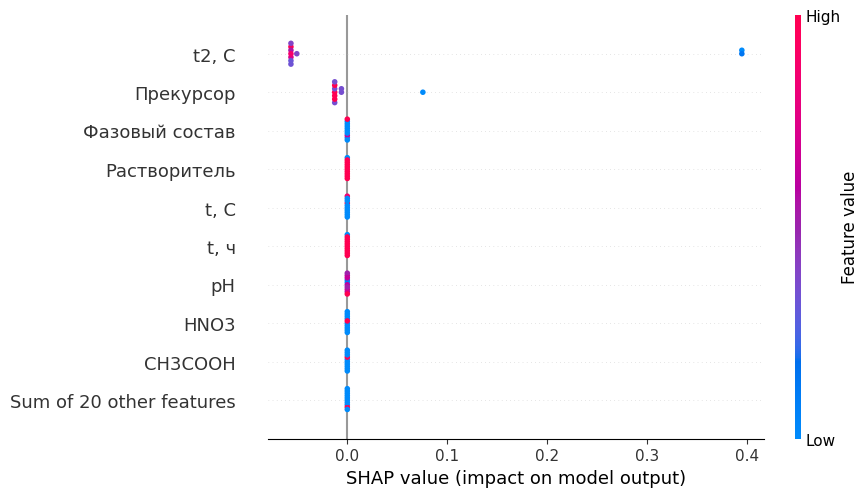

In [ ]:
import shap

explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

In [ ]:
from sklearn.linear_model import LinearRegression
data_v2 = data_v.dropna(subset='D(842), нм')
X = data_v2.drop(columns=['Vпор, см3/г', 'Фазовый состав'])
y = data_v2['Vпор, см3/г']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE (Linear Regression): {mae:.4}')
print(f'MSE (Linear Regression): {mse:.4}')
print(f'R^2 (Linear Regression): {r2:.4}')

feature_weights = pd.DataFrame({'Feature': X.columns, 'Weight': lr_model.coef_})
print(feature_weights)

MAE (Linear Regression): 0.06526
MSE (Linear Regression): 0.00548
R^2 (Linear Regression): 0.9483
         Feature    Weight
0      Прекурсор -0.000145
1   Растворитель -0.000156
2           t, C -0.001854
3           t, ч -0.002502
4             pH -0.000512
5           HNO3  0.004847
6        CH3COOH  0.000493
7            HCl  0.000000
8          H2SO4  0.001669
9          t1, C -0.000248
10      H1, Дж/г -0.001695
11         t2, C  0.000094
12      H2, Дж/г  0.000596
13     a(842), A -0.000029
14    D(842), нм  0.002287
15    SBET, м2/г  0.000517
16         N, нм  0.001912
17       Lk, мкм  0.000191
18   A1(C), at %  0.000363
19   A2(C), at %  0.001173
20   A1(O), at %  0.000629
21   A2(O), at %  0.000023
22  A1(Fe), at % -0.000996
23  A2(Fe), at % -0.001209
24        d1, нм  0.000023
25        d2, нм  0.000078
26         w1, % -0.000344
27         w2, %  0.000344


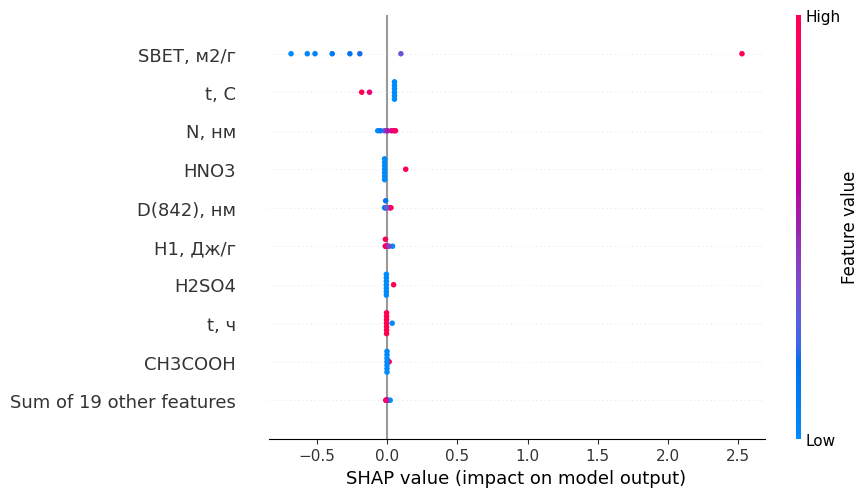

In [ ]:
import shap

explainer = shap.LinearExplainer(lr_model, X)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

**Катализ**

---



1.   Перебрала все комбинации признаков, линейная регрессия обучается лучше всех, но все еще r2 < 0
2.   Деревья не дают веса, xgboost дает плохие метрики



In [ ]:
data_kat = data.dropna(subset='X (PhA), %')
data_kat = data_kat.drop(columns='Фазовый состав')
data_kat.head(10)

,Прекурсор,Растворитель,"t, C","t, ч",pH,HNO3,CH3COOH,HCl,H2SO4,"t1, C",...,"A1(O), at %","A2(O), at %","A1(Fe), at %","A2(Fe), at %","d1, нм","d2, нм","w1, %","w2, %","X (PhA), %","s(ST), %"
0,11,21,150,8,1.5,31,0,0,0,115.4,...,25.92,26.97,3.85,3.25,9.7,25.9,86.06,13.94,44.02,87.98
1,12,22,24,24,6.0,0,0,0,0,114.7,...,24.26,26.81,7.98,7.88,9.1,24.0,90.28,9.72,86.06,86.34
2,12,22,24,24,5.0,0,0,0,0,113.5,...,21.47,27.95,10.51,5.46,9.9,25.3,96.49,3.51,49.58,87.57
3,13,22,24,24,5.7,0,31,0,0,110.8,...,23.21,25.57,8.55,7.02,9.6,25.4,83.61,16.39,51.24,85.41
5,13,22,24,24,5.7,0,0,0,0,116.8,...,25.41,26.48,5.34,7.20,9.5,24.8,81.25,18.75,81.34,82.57
6,13,22,24,24,5.3,0,0,31,0,117.2,...,24.63,25.95,7.46,11.91,9.7,25.2,84.25,15.75,77.81,84.23
8,12,22,24,24,5.5,0,0,0,31,115.3,...,24.15,27.26,6.44,9.25,9.3,24.1,84.29,15.71,57.85,83.67
9,12,22,120,24,5.0,0,0,0,0,116.1,...,22.45,26.86,9.30,10.29,9.5,25.1,87.24,12.76,84.25,85.42


In [ ]:
X = data_kat.drop(columns=['X (PhA), %', 's(ST), %', 't2, C', 'Прекурсор', 'H2, Дж/г', 'w1, %', 'w2, %', 'Растворитель', 'D(842), нм', 'HNO3', 'H1, Дж/г', 'A2(O), at %', 'A2(Fe), at %', 'A2(C), at %', 't, ч', 'N, нм', 't, C', 't1, C'])
y = data_kat[['X (PhA), %', 's(ST), %']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE (Linear Regression): {mae:.4}')
print(f'MSE (Linear Regression): {mse:.4}')

feature_weights = pd.DataFrame({'Feature': X.columns, 'Weight_X': lr_model.coef_[0], 'Weight_S': lr_model.coef_[1]})
print(feature_weights)

MAE (Linear Regression): 2.338
MSE (Linear Regression): 6.641
         Feature  Weight_X      Weight_S
0             pH  6.398757 -1.187690e+00
1        CH3COOH -1.131876  3.775511e-03
2            HCl  0.000000 -1.387779e-16
3          H2SO4 -0.789194 -4.853153e-03
4      a(842), A -0.882738  1.935295e-01
5     SBET, м2/г -0.005649  2.159616e-05
6    Vпор, см3/г -0.113290 -2.654024e-03
7        Lk, мкм -1.316313  2.865442e-01
8    A1(C), at % -1.375507  9.840620e-02
9    A1(O), at % -0.558374 -3.016747e-01
10  A1(Fe), at %  1.962012  1.986280e-01
11        d1, нм -0.258999  4.144420e-02
12        d2, нм -1.665710  3.242693e-01


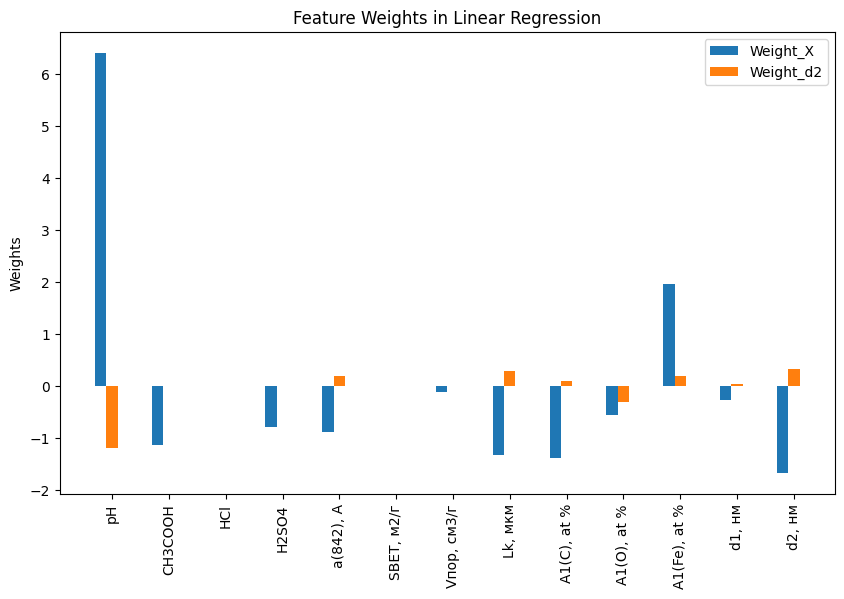

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

weights_x = lr_model.coef_[0]
weights_s = lr_model.coef_[1]

features = X.columns

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2

r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]

ax.bar(r1, weights_x, width=bar_width, label='Weight_X')
ax.bar(r2, weights_s, width=bar_width, label='Weight_d2')

ax.set_xticks([r + bar_width for r in range(len(features))])
ax.set_xticklabels(features, rotation=90)
ax.set_ylabel('Weights')
ax.set_title('Feature Weights in Linear Regression')
ax.legend()

plt.show()

# **Какие то вычисления (черновик)**

In [ ]:
X = data_v2.drop(columns=['Vпор, см3/г'])
y = data_v2['Vпор, см3/г']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XBR', XGBRegressor(n_estimators=100)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=100)))
models.append(('RFR', RandomForestRegressor(n_estimators=100)))

LR: train = 0.07 (0.10) / test = -60205.89
DTR: train = 1.71 (3.30) / test = -63659.90
XBR: train = 5.13 (4.22) / test = -48608.75
GBR: train = 1.89 (3.33) / test = -49376.34
RFR: train = 1.84 (3.33) / test = -47263.96


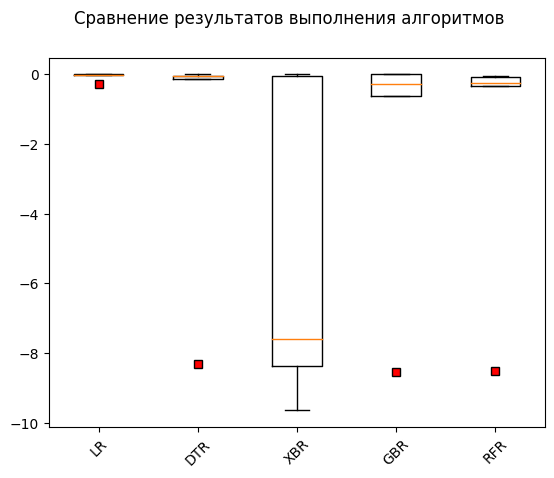

In [ ]:
scores = []
names = []
results = []
predictions = []
msg_row = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    names.append(name)
    results.append(cv_results)

    m_fit = model.fit(X_train, Y_train)
    m_predict = model.predict(X_test)
    predictions.append(m_predict)

    score = r2_score(y_test, m_predict)
    scores.append(score)

    msg = "%s: train = %.2f (%.2f) / test = %.2f" % (name, -cv_results.mean(), cv_results.std(), score)
    msg_row.append(msg)
    print(msg)

fig = pyplot.figure()
fig.suptitle('Сравнение результатов выполнения алгоритмов')
ax = fig.add_subplot(111)
red_square = dict(markerfacecolor='r', marker='s')
pyplot.boxplot(results, flierprops=red_square)
ax.set_xticklabels(names, rotation=45)
pyplot.show()

In [ ]:
X = data_murr.drop(columns=['d1, нм', 'd2, нм', 'w1, %', 'w2, %', 'Фазовый состав', 'HCl', 't1, C', 'H2, Дж/г', 'H2, Дж/г', 'A1(O), at %', 'A2(C), at %', 'A1(Fe), at %', 'A2(Fe), at %', 'Vпор, см3/г', 'Растворитель', 'Прекурсор', 'a(842), A', 'D(842), нм', 'HNO3'])
y = data_murr[['d1, нм', 'd2, нм', 'w1, %', 'w2, %']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4}')
print(f'MSE: {mse:.4}')
print(f'R2-score: {r2:.4}')

feature_weights = pd.DataFrame({'Feature': X.columns, 'Weight_d1': lr_model.coef_[0],
                                'Weight_d2': lr_model.coef_[1], 'Weight_w1': lr_model.coef_[2],
                                'Weight_w2': lr_model.coef_[3]})
print(feature_weights)

MAE: 1.157
MSE: 3.054
R2-score: -0.08083
        Feature  Weight_d1  Weight_d2  Weight_w1  Weight_w2
0          t, C   0.001213   0.007527   0.013047  -0.013047
1          t, ч  -0.006617  -0.024555   0.073517  -0.073517
2            pH  -0.001365  -0.005081   0.015021  -0.015021
3       CH3COOH   0.007157   0.029607   0.042005  -0.042005
4         H2SO4  -0.001818  -0.008532  -0.022288   0.022288
5      H1, Дж/г  -0.004548  -0.015711   0.094177  -0.094177
6         t2, C  -0.000230  -0.001342  -0.016736   0.016736
7    SBET, м2/г   0.000094   0.000166   0.002116  -0.002116
8         N, нм  -0.000166  -0.000290   0.026729  -0.026729
9       Lk, мкм   0.000956   0.003936   0.007089  -0.007089
10  A1(C), at %   0.000665   0.002320  -0.012249   0.012249
11  A2(O), at %  -0.000231  -0.000973  -0.001482   0.001482


In [ ]:
X = data_murr.drop(columns=['d1, нм', 'd2, нм', 'w1, %', 'w2, %', 'a(842), A', 'D(842), нм', 'Прекурсор', 'Растворитель', 'Фазовый состав', 'HNO3', 'HCl', 't1, C',  'H2, Дж/г'])
y = data_murr[['d1, нм', 'd2, нм', 'w1, %', 'w2, %']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(lr_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
lr_model_best = LinearRegression(**best_params)
lr_model_best.fit(X_train, y_train)

y_pred = lr_model_best.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4}')
print(f'MSE: {mse:.4}')
print(f'R2-score: {r2:.4}')

feature_weights = pd.DataFrame({'Feature': X.columns, 'Weight_d1': lr_model_best.coef_[0],
                                'Weight_d2': lr_model_best.coef_[1], 'Weight_w1': lr_model_best.coef_[2],
                                'Weight_w2': lr_model_best.coef_[3]})
print(feature_weights)

MAE: 1.437
MSE: 3.329
R2-score: -0.4843
         Feature  Weight_d1  Weight_d2  Weight_w1  Weight_w2
0           t, C   0.001949   0.011302   0.014917   0.009854
1           t, ч   0.007654   0.057712   0.040381   0.000000
2             pH   0.000000   0.000000   0.000000   0.000000
3        CH3COOH   0.006575   0.018677   0.043910   0.146512
4          H2SO4   0.000000   0.000000   0.000000   0.094114
5       H1, Дж/г   0.000000   0.000000   0.141272   0.000000
6          t2, C   0.016114   0.023359   0.010984   0.000000
7     SBET, м2/г   0.000097   0.000120   0.001970   0.000000
8    Vпор, см3/г   0.000000   0.000000   0.000000   0.000000
9          N, нм   0.000000   0.000000   0.000000   0.000000
10       Lk, мкм   0.000000   0.000000   0.000000   0.000000
11   A1(C), at %   0.000000   0.000000   0.000000   0.000000
12   A2(C), at %   0.035188   0.197643   0.000000   0.000000
13   A1(O), at %   0.000000   0.000000   0.000000   0.426589
14   A2(O), at %   0.000000   0.000000   0.00

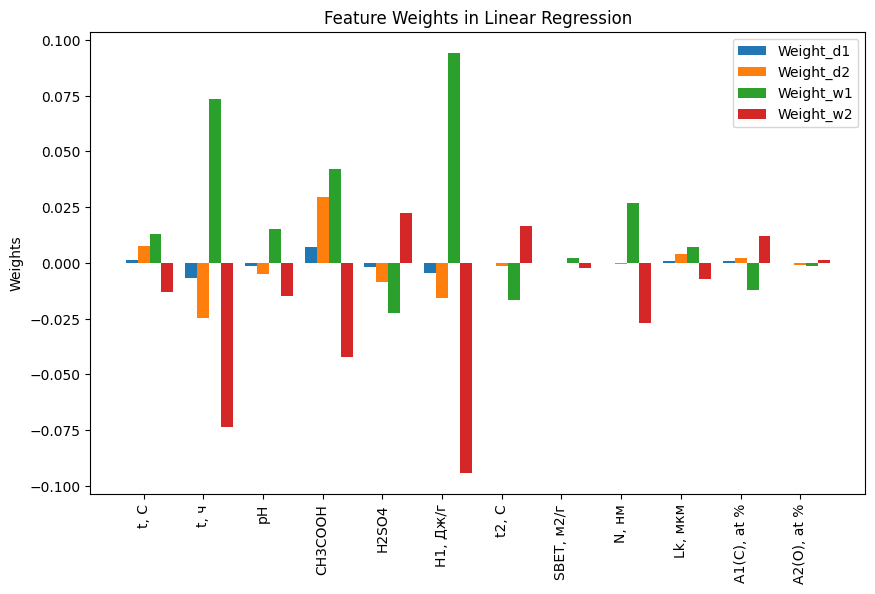

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

weights_d1 = lr_model.coef_[0]
weights_d2 = lr_model.coef_[1]
weights_w1 = lr_model.coef_[2]
weights_w2 = lr_model.coef_[3]

features = X.columns

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2

r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

ax.bar(r1, weights_d1, width=bar_width, label='Weight_d1')
ax.bar(r2, weights_d2, width=bar_width, label='Weight_d2')
ax.bar(r3, weights_w1, width=bar_width, label='Weight_w1')
ax.bar(r4, weights_w2, width=bar_width, label='Weight_w2')

ax.set_xticks([r + bar_width for r in range(len(features))])
ax.set_xticklabels(features, rotation=90)
ax.set_ylabel('Weights')
ax.set_title('Feature Weights in Linear Regression')
ax.legend()

plt.show()